# 8과 [예제] 숫자 vs 숫자

## 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 다이아몬드 데이터   
② 보스톤 시, 타운별 집값  
③ 아이리스 꽃 분류  
④ 뉴욕 공기 오염도


In [2]:
# 다이아몬드
diamond = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/diamonds.csv')
diamond = diamond.sample(3000, random_state = 2022)
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
50989,0.31,Ideal,G,VS2,61.6,55.0,544,4.37,4.39,2.70
42221,0.33,Ideal,E,IF,62.1,55.0,1289,4.43,4.46,2.76
42307,0.41,Ideal,F,VVS1,62.1,57.0,1295,4.75,4.79,2.96
27207,2.02,Very Good,F,SI1,62.7,59.0,17530,7.97,8.03,5.02
22207,1.50,Good,H,VS1,63.4,59.0,10256,7.20,7.29,4.59


In [3]:
# 아이리스 꽃 분류
iris = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston2_NA.csv')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1.0
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.0


In [5]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')
air['Date'] = pd.to_datetime(air['Date'])
air['Month'] = air.Date.dt.month
air['Weekday'] = air.Date.dt.weekday
air.head()

,Ozone,Solar.R,Wind,Temp,Date,Month,Weekday
0,41,190.0,7.4,67,1973-05-01,5,1
1,36,118.0,8.0,72,1973-05-02,5,2
2,12,149.0,12.6,74,1973-05-03,5,3
3,18,313.0,11.5,62,1973-05-04,5,4
4,19,NaN,14.3,56,1973-05-05,5,5


## 2.시각화

### 1) 산점도 : plt.scatter, sns.scatterplot, sns.jointplot

① iris의 Petal.Length와 Petal.Width의 관계를 살펴보기 위해 산점도를 그려봅시다.
* plt.scatter

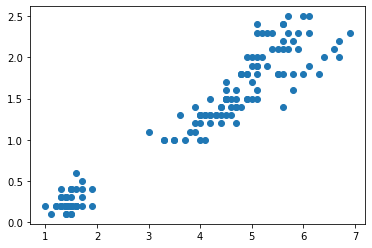

In [6]:
plt.scatter(iris['Petal.Length'], iris['Petal.Width'])
plt.show()

* sns.scatterplot

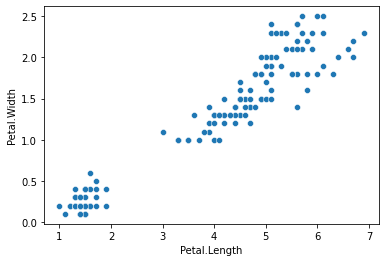

In [7]:
sns.scatterplot(x='Petal.Length', y='Petal.Width', data=iris)
plt.show()

* sns.scatterplot(    , hue = 'Species')

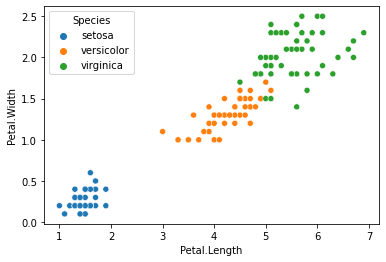

In [8]:
sns.scatterplot(x='Petal.Length', y='Petal.Width', data=iris, hue='Species')
plt.show()

* sns.joinplot

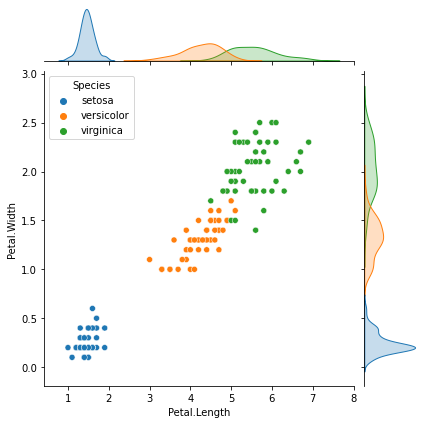

In [9]:
sns.jointplot(x='Petal.Length', y='Petal.Width', data=iris, hue='Species')
plt.show()

* 그래프로 부터 파악된 내용을 적어 봅시다.

> 꽃의 종류에 따른 일반적인 길이/넓이의 값을 알 수 있습니다.
> - 일반적으로 꽃의 길이기 길면 넓이도 큽니다.
> - 꽃이 면적이 작으면 setosa입니다.
>     - 꽃의 길이가 3~5이면 Versicolor일 가능성이 높습니다.
>     - 꽃의 길이가 5-7이면 Virginica일 가능성이 높습니다.

② boston의 indus(비소매상업지구의 면적비율)와 medv(집값)의 관계를 살펴보기 위해 산점도를 그려봅시다.
* plt.scatter

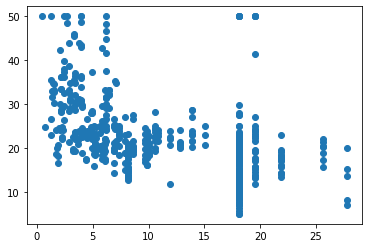

In [10]:
plt.scatter(boston['indus'], boston['medv'])
plt.show()

* sns.scatterplot

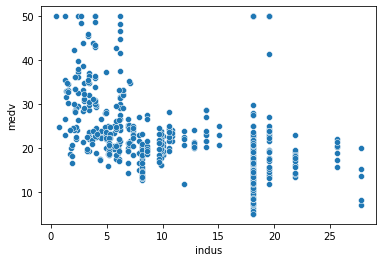

In [11]:
sns.scatterplot(x='indus', y='medv', data=boston)
plt.show()

* sns.jointplot

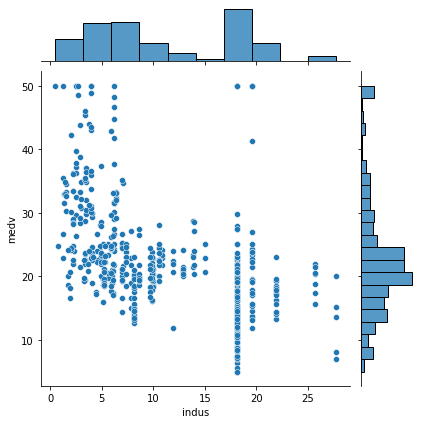

In [12]:
sns.jointplot(x='indus', y='medv', data=boston)
plt.show()

* 그래프로 부터 파악된 내용을 적어 봅시다.

> 보스턴 비소매상업지구의 면적크기와 집값의 상관관계를 알 수 있습니다.
> - 비소매상업지구의 크기가 넓을수록 집값이 떨어집니다.
>     - 그러나 집값이 낮다고해서 반드시 비소매상업지구가 좁다는 의미는 아닙니다.

③ air의 Temp와 Ozone의 관계를 살펴보기 위해 산점도를 그려봅시다.
* plt.scatter

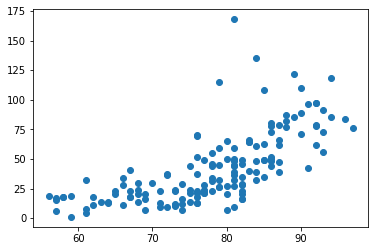

In [13]:
plt.scatter(air['Temp'], air['Ozone'])
plt.show()

* sns.scatterplot

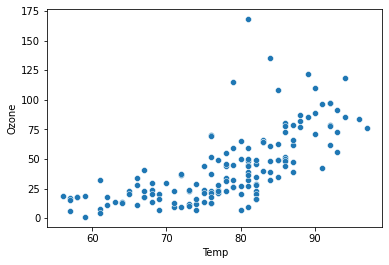

In [14]:
sns.scatterplot(x='Temp', y='Ozone', data=air)
plt.show()

* sns.jointplot

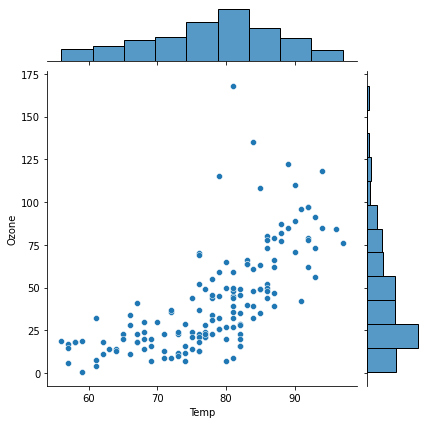

In [15]:
sns.jointplot(x='Temp', y='Ozone', data=air)
plt.show()

* 그래프로 부터 파악된 내용을 적어 봅시다.

> 일반적으로 기온이 높을수록 오존의 농도가 진해진 경향을 가지고 있습니다.  
> 대부분의 오존은 0 ~ 50사이에 존재합니다.  
> 대부분의 기온은 70 ~ 90사이에 존재합니다  

④ diamond의 carat과 price의 관계를 살펴보기 위해 산점도를 그려봅시다.
* plt.scatter

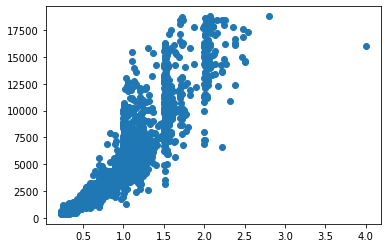

In [16]:
plt.scatter(diamond['carat'], diamond['price'])
plt.show()

* sns.scatterplot

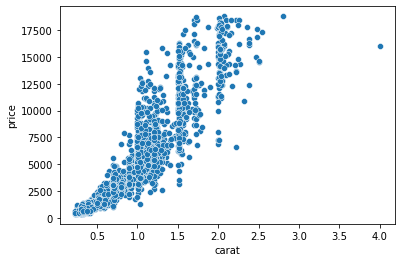

In [17]:
sns.scatterplot(x = 'carat', y = 'price', data=diamond)
plt.show()

* sns.jointplot

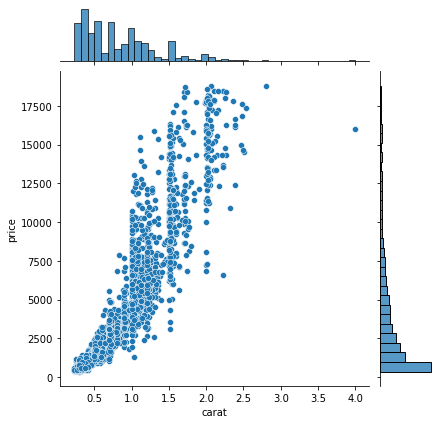

In [18]:
sns.jointplot(x = 'carat', y = 'price', data=diamond)
plt.show()

* 그래프로 부터 파악된 내용을 적어 봅시다.

> - 일반적으로 캐럿이 낮을수록 가격이 떨어집니다.
> - 대부분의 다이아몬드의 가격은 5000이하입니다.
> - 캐럿과 가격은 양의 상관관계를 보입니다.

### 2) 한꺼번에 산점도 그리기 : sns.pairplot

① air 데이터프레임에서 Month와 Day를 제외하고 산점도를 한꺼번에 그려봅시다.

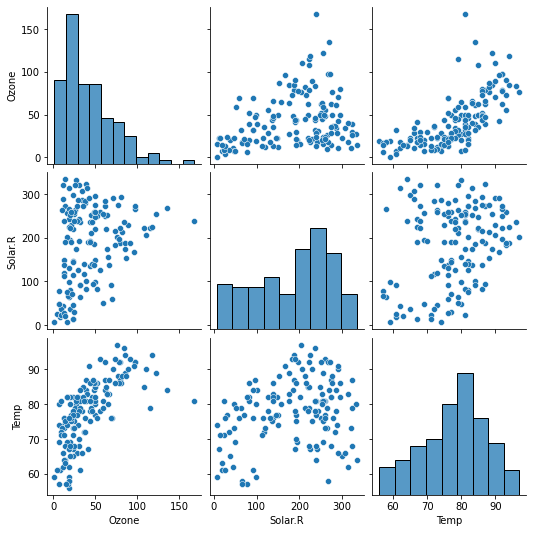

In [19]:
sns.pairplot(data=air, vars=['Ozone','Solar.R','Temp'])
plt.show()

② iris 데이터프레임에 대해서, Species를 제외하고 한꺼번에 산점도를 그려봅시다.

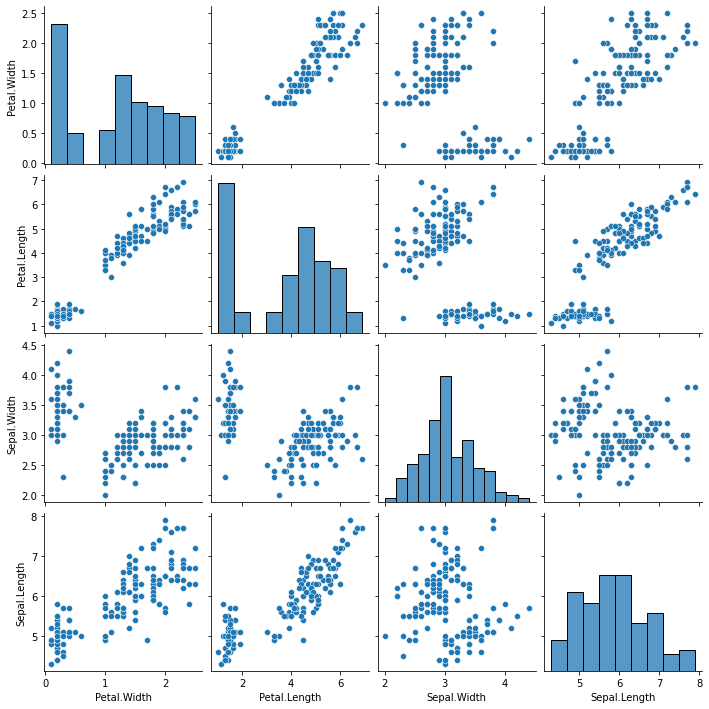

In [20]:
sns.pairplot(iris, vars=['Petal.Width', 'Petal.Length', 'Sepal.Width', 'Sepal.Length'])
plt.show()

## 3.수치화 : 상관분석

In [21]:
import scipy.stats as spst

① boston.indus와 boston.medv의 관계를 수치화 해 봅시다.  

결과를 해석해 봅시다.

In [22]:
spst.pearsonr(boston['indus'], boston['medv'])

(-0.4837251600283729, 4.900259981751351e-31)

> -0.48의 상관계수
> - p_value : 0에 가깝다 (4.9e-31)  
> 때문에 음의 상관관계를 어느정도 가지는 형식이다.

② diamond의 각 변수들 간에 상관 계수를 구해 봅시다.

In [23]:
diamond.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.027081,0.160081,0.918257,0.978485,0.976614,0.962422
depth,0.027081,1.000000,-0.305373,-0.016220,-0.027121,-0.030945,0.091622
table,0.160081,-0.305373,1.000000,0.097818,0.172048,0.166498,0.130414
price,0.918257,-0.016220,0.097818,1.000000,0.884365,0.886169,0.866249
x,0.978485,-0.027121,0.172048,0.884365,1.000000,0.997668,0.980012
y,0.976614,-0.030945,0.166498,0.886169,0.997668,1.000000,0.980099
z,0.962422,0.091622,0.130414,0.866249,0.980012,0.980099,1.000000


③ 위 결과에서 가장 강한 상관관계와 약한 상관관계를 찾아 봅시다.

> - 가장 강한 상관관계
    - 0.997668, (x&y) 가장 강한 양의 상관관계
    - -0.305373, (depth&table) 가장 강한 음의 상관관계
> - 가장 약한 상관관계
    - 0.016220 (depth&price)